<a href="https://colab.research.google.com/github/Mounika-Alwar/ML-Practice/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apply k-means clustering on a synthetic dataset. Use the elbow method and silhouette score to choose k. Compare with Gaussian Mixture Model clustering.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

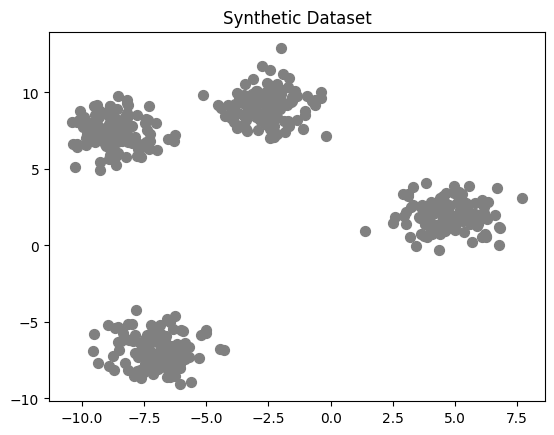

In [2]:
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=50, c='gray')
plt.title("Synthetic Dataset")
plt.show()

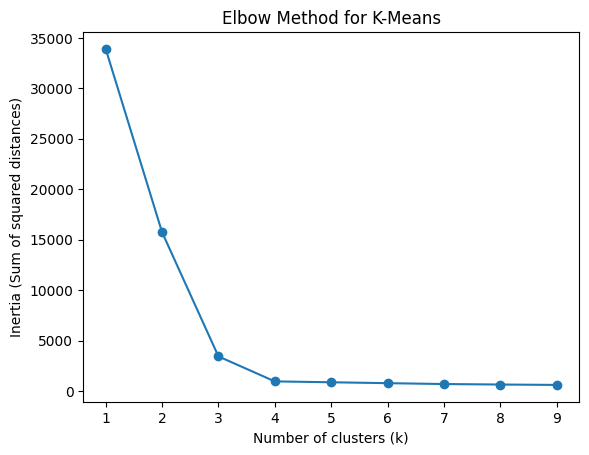

In [3]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for K-Means')
plt.show()

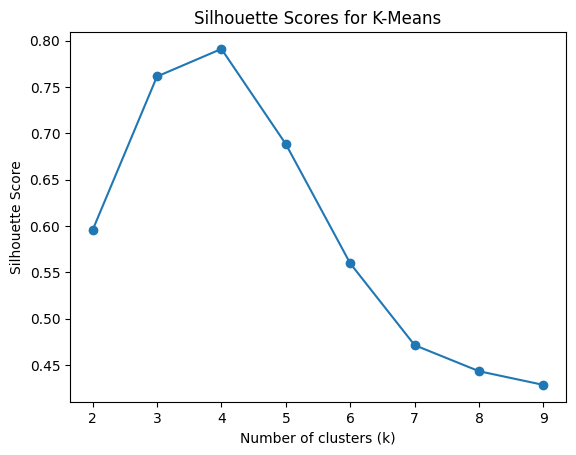

In [4]:
sil_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)

plt.plot(range(2,10), sil_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means')
plt.show()

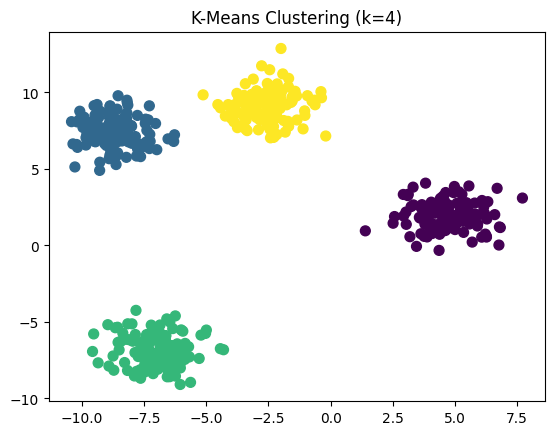

In [5]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.show()

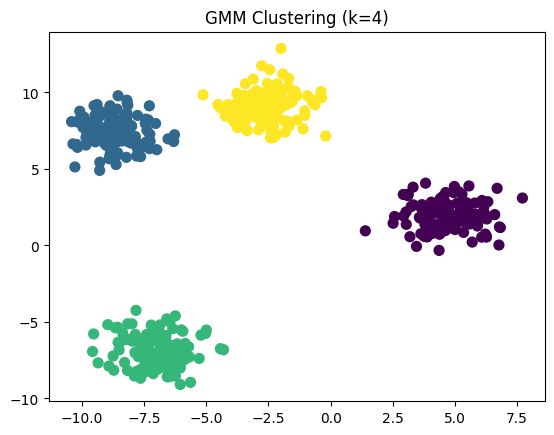

In [6]:
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', s=50)
plt.title(f'GMM Clustering (k={optimal_k})')
plt.show()

In [7]:
kmeans_sil = silhouette_score(X, kmeans_labels)
gmm_sil = silhouette_score(X, gmm_labels)
print(f"K-Means Silhouette Score: {kmeans_sil:.4f}")
print(f"GMM Silhouette Score   : {gmm_sil:.4f}")

K-Means Silhouette Score: 0.7911
GMM Silhouette Score   : 0.7911
